## Bayesian Optimisation

source:
https://medium.com/data-science/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f
https://github.com/WillKoehrsen/hyperparameter-optimization/blob/master/Introduction%20to%20Bayesian%20Optimization%20with%20Hyperopt.ipynb

### Sequential Model Based Optimization using the Tree Parzen Estimator

In [1]:
!pip install hyperopt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hyperopt import hp
from hyperopt.pyll.stochastic import sample
from hyperopt import rand, tpe
from hyperopt import Trials
from hyperopt import fmin

In [3]:
# objective function to minimise
def objective(x):
        
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Return the value of the polynomial
    return f(x) * 0.05

Minimum of -219.8012 occurs at 4.8779


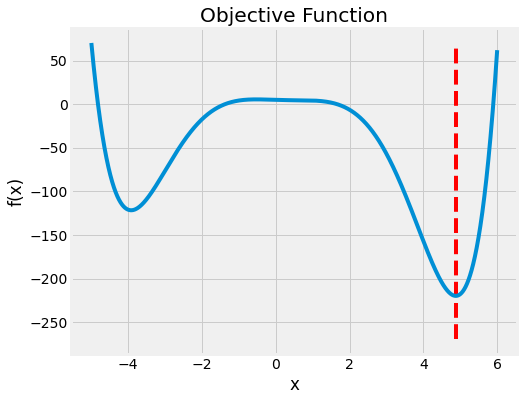

In [4]:
# space over which to evaluate the function
x = np.linspace(-5, 6, 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [5]:
# domain
space = hp.uniform('x', -5, 6)

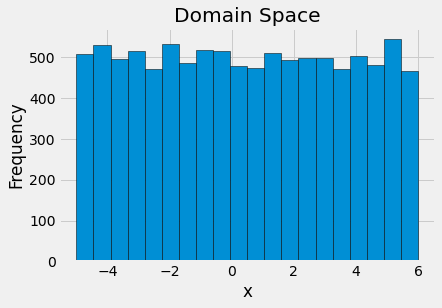

In [6]:
samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))
    

# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

In [7]:
# hyperparameter optimisation algorithm
# options: random (rand), Tree Parzen Estimator (tpe)

# Create the algorithm
tpe_algo = tpe.suggest

In [8]:
# history
# Create trials object
tpe_trials = Trials()

In [9]:
# Run 2000 evaluations with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=2000)
print(tpe_best)

100%|██████████| 2000/2000 [00:14<00:00, 141.66trial/s, best loss: -219.8012035341362]
{'x': 4.878071723636506}


In [12]:
# Print out information about losses
print('Minimum loss attained with TPE:    {:.4f}'.format(tpe_trials.best_trial['result']['loss']))
print('Actual minimum of f(x):            {:.4f}'.format(miny))

Minimum loss attained with TPE:    -219.8012
Actual minimum of f(x):            -219.8012


In [13]:
# Print out information about number of trials
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['x'][0]))


Number of trials needed to attain minimum with TPE:    1383


In [14]:
# Print out information about value of x
print('\nBest value of x from TPE:  {:.4f}'.format(tpe_best['x']))
print('Actual best value of x:      {:.4f}'.format(minx))


Best value of x from TPE:  4.8781
Actual best value of x:      4.8779


In [15]:
tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 'iteration': tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x']})
tpe_results.head()

,loss,iteration,x
0,-29.979560,0,2.597285
1,-22.334288,1,-2.119772
2,-31.808815,2,-2.311263
3,5.247961,3,-0.775749
4,4.567039,4,0.551896


In [16]:
tpe_results['rolling_average_x'] = tpe_results['x'].rolling(50).mean().fillna(method = 'bfill')
tpe_results['rolling_average_loss'] = tpe_results['loss'].rolling(50).mean().fillna(method = 'bfill')
tpe_results.head()

,loss,iteration,x,rolling_average_x,rolling_average_loss
0,-29.979560,0,2.597285,1.891183,-69.564403
1,-22.334288,1,-2.119772,1.891183,-69.564403
2,-31.808815,2,-2.311263,1.891183,-69.564403
3,5.247961,3,-0.775749,1.891183,-69.564403
4,4.567039,4,0.551896,1.891183,-69.564403


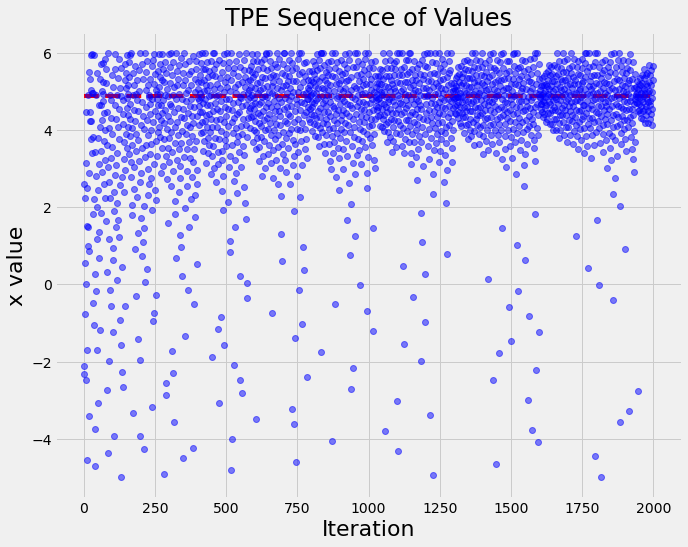

In [17]:
plt.figure(figsize = (10, 8))
plt.plot(tpe_results['iteration'], tpe_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('TPE Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

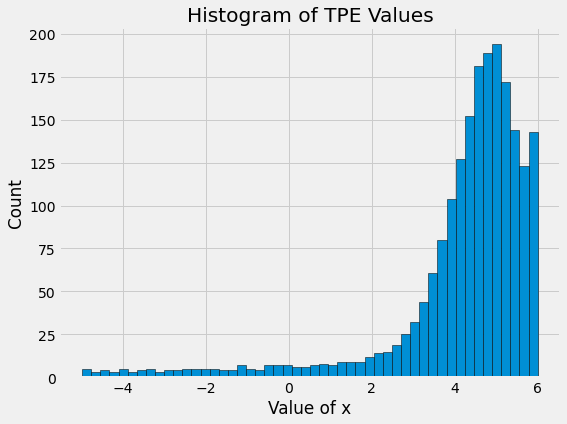

In [18]:
plt.figure(figsize = (8, 6))
plt.hist(tpe_results['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

Best Loss of -219.8012 occured at iteration 1383


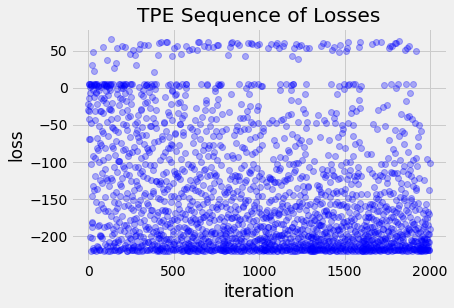

In [19]:
# Sort with best loss first
tpe_results = tpe_results.sort_values('loss', ascending = True).reset_index()

plt.plot(tpe_results['iteration'], tpe_results['loss'], 'bo', alpha = 0.3);
plt.xlabel('iteration'); plt.ylabel('loss'); plt.title('TPE Sequence of Losses');

print('Best Loss of {:.4f} occured at iteration {}'.format(tpe_results['loss'][0], tpe_results['iteration'][0]))